In [1]:
# Necessary Imports
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
def information_content(p_x):
    """ Paramters:
  p_x: probability of an event x
  returns: Information content I 
  """
  ### Begin Solution
    I = -np.log2(p_x)
    return I
  ### End Solution

In [3]:
# Helper Function
# Initial plotting function
def plot_function(function, inputs, title=None, ylabel=None):
    fig, ax = plt.subplots()
    ax.plot(inputs, function(inputs))
    if title:
        ax.set_title(title)
    ax.set_xticks(np.linspace(0, 1, 11))
    ax.set_xlabel("Probability of $x$")
    if ylabel:
        ax.set_ylabel(ylabel)
    plt.show()

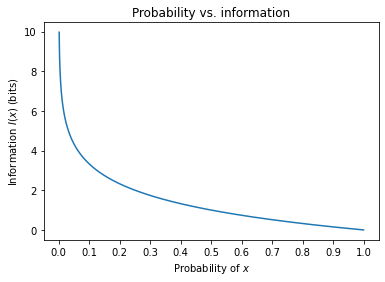

In [4]:
# Write your code to display figure below
p_x = np.linspace(1, 0, 1001, endpoint=False)[1:] # Probabilities on (0, 1)
plot_function(information_content, p_x, title="Probability vs. information", ylabel="Information $I(x)$ (bits)")

In [5]:
path = "./data/samplecar.csv"
dataset = pd.read_csv(path)

In [6]:
dataset.head()

,Type,Price,Buy
0,SUV,H,No
1,HB,H,No
2,HB,H,Yes
3,HB,L,No
4,SEDAN,H,Yes


In [7]:
# identify features and label and seperate it
features = dataset.iloc[:, :-1]
target = dataset.iloc[:,-1:]

# sanity check
assert features.shape[0] == target.shape[0], " len(features) == len(target)"

In [8]:
print(features)

    Type Price
0    SUV     H
1     HB     H
2     HB     H
3     HB     L
4  SEDAN     H
5  SEDAN     L
6    SUV     L
7  SEDAN     H
8     HB     L
9    SUV   Hot


In [9]:
print(target)

   Buy
0   No
1   No
2  Yes
3   No
4  Yes
5  Yes
6   No
7  Yes
8  Yes
9  Yes


In [10]:
dataset['Buy'].value_counts()

Yes    6
No     4
Name: Buy, dtype: int64

In [11]:
tot = len(dataset)
tot_n = dataset[dataset["Buy"] == "No"].shape[0]
tot_y = dataset[dataset["Buy"] == "Yes"].shape[0]
prob_y = tot_y/tot
prob_n = tot_n/tot
print(prob_y, prob_n)
H_tot = -prob_y * np.log2(prob_y) - prob_n * np.log2(prob_n)
print(H_tot)

0.6 0.4
0.9709505944546686


In [12]:
Type = dataset["Type"].unique()
SUV = dataset[dataset["Type"] == "SUV"]
#print(SUV.head())
tot_SUV = len(SUV)
tot_SUV_yes = SUV[SUV["Buy"] == "Yes"].shape[0]
tot_SUV_no = SUV[SUV["Buy"] == "No"].shape[0]
prob_SUV_yes = tot_SUV_yes/tot_SUV
prob_SUV_no = tot_SUV_no/tot_SUV
H_Type_SUV = -prob_SUV_yes * np.log2(prob_SUV_yes) - prob_SUV_no * np.log2(prob_SUV_no)
print(H_Type_SUV)

0.9182958340544896


In [13]:
Type = dataset["Type"].unique()
HB = dataset[dataset["Type"] == "HB"]
#print(HB.head())
tot_HB = len(HB)
tot_HB_yes = HB[HB["Buy"] == "Yes"].shape[0]
tot_HB_no = HB[HB["Buy"] == "No"].shape[0]
prob_HB_yes = tot_HB_yes/tot_HB
prob_HB_no = tot_HB_no/tot_HB
H_Type_HB = -prob_HB_yes * np.log2(prob_HB_yes) - prob_HB_no * np.log2(prob_HB_no)
print(H_Type_HB)

1.0


In [14]:
Type = dataset["Type"].unique()
SEDAN = dataset[dataset["Type"] == "SEDAN"]
#print(SEDAN.head())
tot_SEDAN = len(SEDAN)
tot_SEDAN_yes = SEDAN[SEDAN["Buy"] == "Yes"].shape[0]
tot_SEDAN_no = SEDAN[SEDAN["Buy"] == "No"].shape[0]
prob_SEDAN_yes = tot_SEDAN_yes/tot_SEDAN
prob_SEDAN_no = tot_SEDAN_no/tot_SEDAN
prob_SEDAN_no = 0.000000001
H_Type_SEDAN = -prob_SEDAN_yes * np.log2(prob_SEDAN_yes) - prob_SEDAN_no * np.log2(prob_SEDAN_no)
print(H_Type_SEDAN)

2.9897352853986267e-08


In [15]:
prob_SUV = tot_SUV/tot
prob_HB = tot_HB/tot
prob_SEDAN = tot_SEDAN/tot
I_Type = prob_SUV * H_Type_SUV + prob_HB * H_Type_HB + prob_SEDAN * H_Type_SEDAN
print(I_Type)

0.6754887591855527


In [16]:
Price = dataset["Price"].unique()
H = dataset[dataset["Price"] == "H"]
#print(H.head())
tot_H = len(H)
tot_H_yes = H[H["Buy"] == "Yes"].shape[0]
tot_H_no = H[H["Buy"] == "No"].shape[0]
prob_H_yes = tot_H_yes/tot_H
prob_H_no = tot_H_no/tot_H
H_Price_H = -prob_H_yes * np.log2(prob_H_yes) - prob_H_no * np.log2(prob_H_no)
print(H_Price_H)

0.9709505944546686


In [17]:
Price = dataset["Price"].unique()
L = dataset[dataset["Price"] == "L"]
#print(L.head())
tot_L = len(L)
tot_L_yes = L[L["Buy"] == "Yes"].shape[0]
tot_L_no = L[L["Buy"] == "No"].shape[0]
prob_L_yes = tot_L_yes/tot_L
prob_L_no = tot_L_no/tot_L
H_Price_L = -prob_L_yes * np.log2(prob_L_yes) - prob_L_no * np.log2(prob_L_no)
print(H_Price_L)

1.0


In [18]:
prob_H = tot_H/tot
prob_L = tot_L/tot
I_Price = prob_H * H_Price_H + prob_L * H_Price_L
print(I_Price)

0.8854752972273343


In [20]:
prob_H

0.5

In [19]:
I_Price > I_Type

True